In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("diabetes.csv")

In [3]:
dataset.shape

(768, 9)

In [4]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
print(df.isnull().sum())

NameError: name 'df' is not defined

In [ ]:
dataset.describe()

In [ ]:
sns.histplot(dataset.Age)
plt.title("Age distribution")
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
plt.title("product purchasing based on the age")
sns.histplot(x = "Age", hue="Outcome",data=dataset)


In [7]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


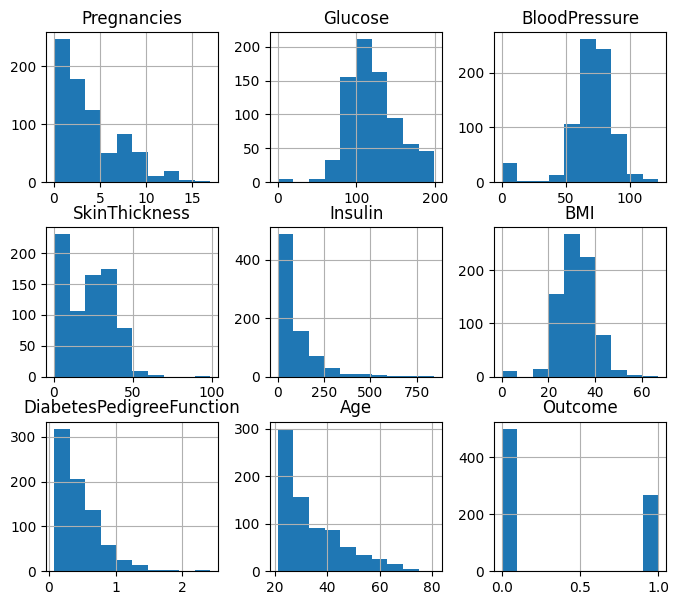

In [8]:
# Visuvalizations for EDA
dataset.hist(figsize=(8,7))
plt.show()


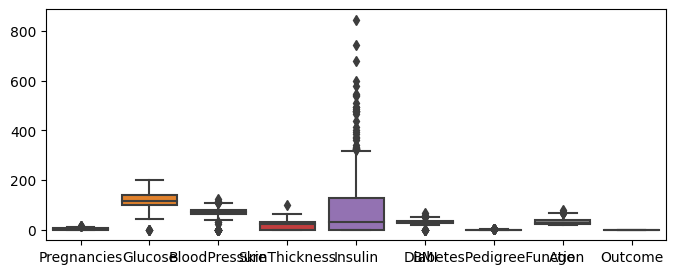

In [9]:
# bOXPLOTTING FOR EDA
plt.figure(figsize=(8,3))
sns.boxplot(data=dataset)
plt.show()


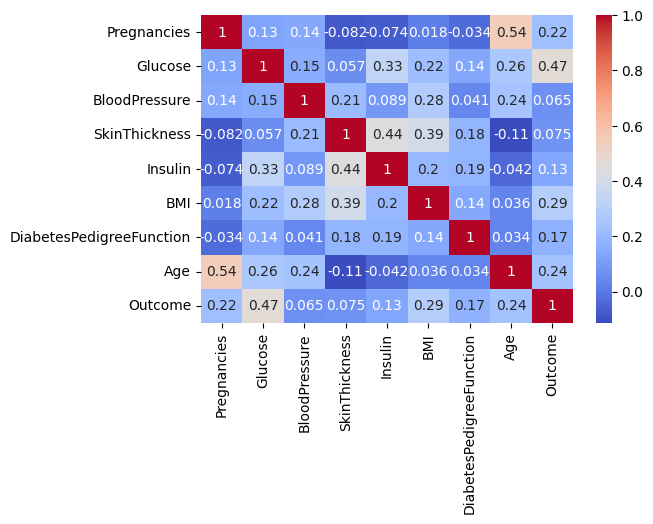

In [10]:
# Plotting correlation matrix to identify the relationship between variables
corr = dataset.corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


In [11]:
X = dataset.drop('Outcome', axis=1).values
y = dataset['Outcome'].values

In [12]:
# Filtering the dataset to include only individuals under 40 years old
dataset = dataset[dataset['Age'] < 40]

# Separating the features and target variable
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [16]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [17]:
y_pred = lr.predict(X_test)


In [18]:
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)


In [19]:
print(accuracy)

0.7610619469026548


In [20]:
print(cm)

[[67  8]
 [19 19]]


In [21]:
# Calculate below metrics on the test data
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('AUC-ROC:', auc_roc)

Precision: 0.7037037037037037
Recall: 0.5
F1-score: 0.5846153846153846
AUC-ROC: 0.6966666666666665
